# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 2/3:  Implementacja propagacji wstecznej błędu (2 tygodnie, 4 punkty)

W ramach tego laboratorium trzeba zaimplementować uczenie sieci neuronowej propagacją wsteczną błędu.


Aby sprawdzić implementację, należy wykonać uczenie na prostych danych do uczenia dostarczonych na
zajęciach. Następnie należy zaimplementować metodę wizualizacji wartości wag sieci w kolejnych iteracjach
i, w przypadku gdy nie udaje się nauczyć sieci, spróbować wykorzystać te wizualizacje do ustalenia
przyczyny problemu. Zaimplementować wersję z aktualizacją wag po prezentacji wszystkich wzorców i
wersję z aktualizacją po prezentacji kolejnych porcji (batch). Porównać szybkość uczenia dla każdego z
wariantów.

Inicjować wagi z rozkładu jednostajnego na przedziale [0,1]. Opcjonalnie zaimplementować inną metodą
inicjowania wag. Albo metodę He albo Xavier.

Przetestować uczenie sieci na następujących zbiorach (w nawiasach wartość MSE, aby otrzymać 4 punkty):
- square-simple (jeśli sieć nie jest w stanie się nauczyć tej funkcji to coś jest bardzo źle zrobione, MSE:
4),
- steps-small (MSE: 4),
- multimodal-large (MSE: 40).
(Wartości MSE liczone na nieznormalizowanych danych)

#### TODO:

- ~~change the weights initialization to uniform(0,1), Xavier or He~~
- implemnent cost function for MSE
- ~~implement gradients for activation functions~~
- ~~implement backpropagation without bias~~
- ~~implement backpropagation with bias~~
- implement batch learning
- implement visualization
- implement visualization for batch learning
- compare learning speed with and without batch learning


In [1]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd

## Dataset 1: Square Simple

In [2]:
df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")#.sample(frac=1).reset_index(drop=True)
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")#.sample(frac=1).reset_index(drop=True)
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1          -0.980437  -43.486918
2          -1.219074    3.752808
3           0.124243 -128.610721
4           1.227789    5.671828
5           1.067348  -27.469169


#### Model 1

In [31]:
net1 = NeuralNetwork(weights_randomizer='uniform')
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=100, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

Epoch:    1/200,   MSE train: 12551.99,   MSE test:  11456.1
Epoch:   21/200,   MSE train:   20.463,   MSE test:   19.457
Epoch:   41/200,   MSE train:   15.178,   MSE test:   13.969
Epoch:   61/200,   MSE train:   14.314,   MSE test:   12.517
Epoch:   81/200,   MSE train:   12.091,   MSE test:   10.446
Epoch:  101/200,   MSE train:    9.809,   MSE test:    8.448
Epoch:  121/200,   MSE train:    7.732,   MSE test:    6.683
Epoch:  141/200,   MSE train:      5.9,   MSE test:    5.168
Epoch:  161/200,   MSE train:    4.369,   MSE test:    3.929
Epoch:  181/200,   MSE train:    3.167,   MSE test:    2.976
Epoch:  200/200,   MSE train:    2.305,   MSE test:    2.305


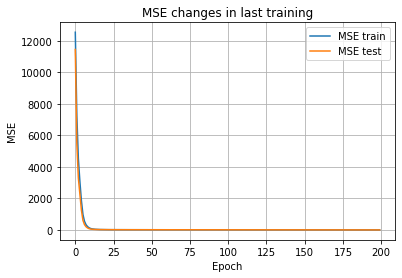

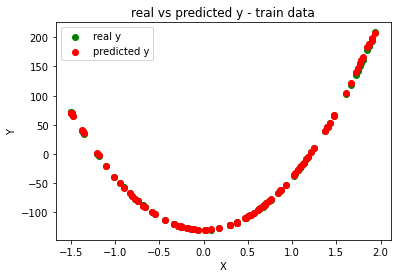

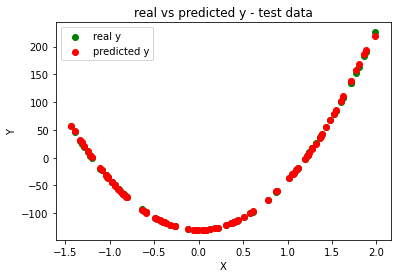

In [32]:
net1.train(x_train, y_train,x_test,y_test, epochs=200, learning_rate=0.003, batch_size=1)
net1.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net1.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net1.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

## Dataset 2: Steps Small

In [33]:
df_train = pd.read_csv('data/regression/steps-small-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-small-test.csv').set_index("Unnamed: 0")
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.786896  160
2           1.189037   80
3          -0.917923  -80
4          -0.518967  -80
5          -0.011570    0


#### Model 1

In [61]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=20, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=20, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/1000,   MSE train: 6419.043,   MSE test: 7644.042
Epoch:  101/1000,   MSE train:  258.968,   MSE test:  417.437
Epoch:  201/1000,   MSE train:    7.646,   MSE test:   88.814
Epoch:  301/1000,   MSE train:     3.12,   MSE test:   90.803
Epoch:  401/1000,   MSE train:    2.088,   MSE test:    92.17
Epoch:  501/1000,   MSE train:    1.574,   MSE test:   92.997
Epoch:  601/1000,   MSE train:     1.26,   MSE test:   93.505
Epoch:  701/1000,   MSE train:    1.048,   MSE test:   93.824
Epoch:  801/1000,   MSE train:    0.895,   MSE test:   94.026
Epoch:  901/1000,   MSE train:    0.779,   MSE test:   94.149
Epoch: 1000/1000,   MSE train:     0.69,   MSE test:   94.217


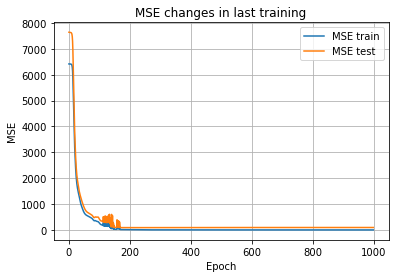

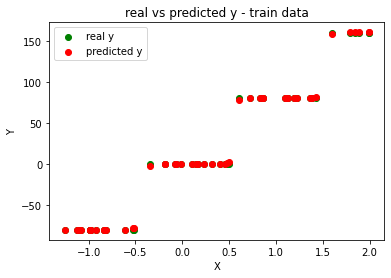

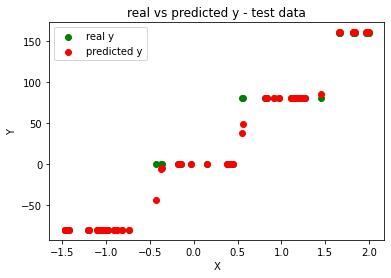

In [62]:
net2.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.001, batch_size=1)
net2.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net2.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net2.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

## Multimodal Large

In [64]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1

In [67]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=100, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

Epoch:    1/100,   MSE train: 5299.529,   MSE test: 5268.711
Epoch:   11/100,   MSE train:  914.859,   MSE test:  851.405
Epoch:   21/100,   MSE train:  230.115,   MSE test:  228.677
Epoch:   31/100,   MSE train:  170.633,   MSE test:  172.089
Epoch:   41/100,   MSE train:  126.247,   MSE test:  127.939
Epoch:   51/100,   MSE train:   81.298,   MSE test:   84.217
Epoch:   61/100,   MSE train:   49.221,   MSE test:   53.148
Epoch:   71/100,   MSE train:   31.645,   MSE test:   36.172
Epoch:   81/100,   MSE train:   21.416,   MSE test:   26.189
Epoch:   91/100,   MSE train:   15.543,   MSE test:   20.446
Epoch:  100/100,   MSE train:   12.194,   MSE test:   17.145


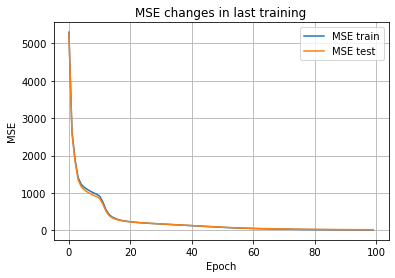

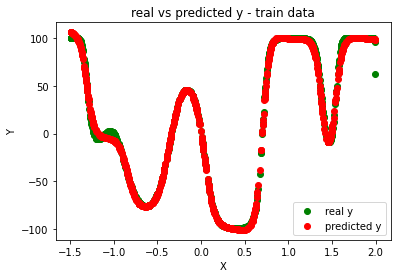

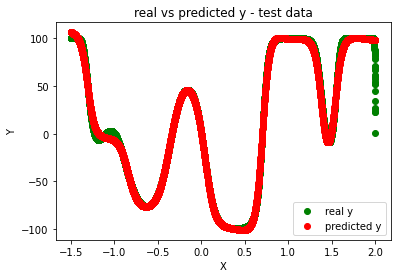

In [68]:
net2.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.003, batch_size=1)
net2.plot_training_history()
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green",label="real y")
plt.scatter(x_train, net2.predict(x_train), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - train data")
plt.show()

plt.scatter(x_test, y_test, color="green",label="real y")
plt.scatter(x_test, net2.predict(x_test), color="red",label="predicted y")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("real vs predicted y - test data")
plt.show()

#### Results

MSE for the `square simple` dataset is:  
- train: 
- test: 

MSE for the `steps small` dataset is:  
- train: 
- test: 

MSE for the `multimodal large` dataset is:
- train:
- test: